mean:var 0.43869018983668495


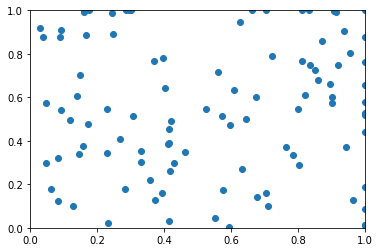

In [165]:
import mcmc
import matplotlib.pyplot as plt
import numpy as np
import importlib 
importlib.reload(mcmc)

def kappa_von_mises(kappa, cos_psi):
    
    return  np.sum(-kappa + kappa * cos_psi + np.log( (kappa/(2*np.pi*(1 - np.exp(-2*kappa))))))
   
    
def kappa_von_mises_2d(kappa, cos_psi):
    
    nx, ny = np.shape(kappa)
    cospsi_tile = np.tile(cos_psi,(ny,1)).T

    test = np.sum(-kappa + kappa * cospsi_tile + np.log( (kappa/(2*np.pi*(1 - np.exp(-2*kappa))))), axis = 0)
    
    return  np.mean(np.exp(-kappa + kappa * cospsi_tile + np.log( (kappa/(2*np.pi*(1 - np.exp(-2*kappa))))))   , axis = 0)


def kappa_von_mises_from_kappa(kappa, cos_psi_arr):
    
    return  np.exp(-kappa + kappa * cos_psi_arr + np.log( (kappa/(2*np.pi*(1 - np.exp(-2*kappa))))))
   
    

def kappa_dist(data, kappa_min=0.1, kappa_max=100, N_kappa_sample=1000, cosi_sample = 1000):
    
    cosi_star, cosi_star_err, cosi_disk, cosi_disk_err = data
    kappa_arr = np.linspace(kappa_min, kappa_max, N_kappa_sample)
    kappa_tile = np.tile(kappa_arr,(cosi_sample,1))
    prob_all = np.ones(len(kappa_arr))
    
    for i in range(len(cosi_star)):
            prob = 0
            cos_psi =  histogram_cos_psi_arr(cosi_star[i], cosi_star_err[i], cosi_disk[i], cosi_disk_err[i],cosi_sample)
            prob = kappa_von_mises_2d(kappa_tile, cos_psi)
            prob_all *= prob
    return prob_all, kappa_arr
        
def flag_cos(cos):
    
    flag_1 = cos>1-1e-8
    cos[flag_1] = 2 - cos[flag_1] - 2e-8
    flag_2 = cos<-1+1e-8
    cos[flag_2] =  -2 - cos[flag_2]  + 2e-8
    return cos
    

    
def gaussian_cosi(cos_star, cos_star_err, N):
    cos = np.random.normal(cos_star, cos_star_err, N)
    cos = flag_cos(cos)
    sin_s = np.sqrt(1-cos**2)
    
    return cos, sin_s

def histogram_cos_psi(cos_star, cos_star_err, cos_disk, cos_disk_err, num_sample = 1000):
    cos_psi_sample =  cos_star + np.random.randn(len(cos_star)) *cos_star_err
    cos_psi_sample_star = flag_cos(cos_psi_sample)    
    sin_psi_sample_star  =  np.sqrt(1- cos_psi_sample_star**2)
    
    cos_psi_sample =  cos_disk + np.random.randn(len(cos_star)) *cos_disk_err
    cos_psi_sample_disk = flag_cos(cos_psi_sample)    
    sin_psi_sample_disk =  np.sqrt(1- cos_psi_sample_disk**2)  
    PA_arr = np.random.rand(len(cos_star)) * np.pi
    cos_psi = sin_psi_sample_star * sin_psi_sample_disk * np.cos(PA_arr) + cos_psi_sample_star * cos_psi_sample_disk
    return cos_psi

def histogram_cos_psi_arr(cos_star, cos_star_err, cos_disk, cos_disk_err, num_sample):
    cosstar_arr, sinstar_arr = gaussian_cosi(cos_star, cos_star_err, num_sample)
    cosdisk_arr, sindisk_arr = gaussian_cosi(cos_disk, cos_disk_err, num_sample)
    PA_arr = np.random.rand(num_sample) * np.pi
    cos_psi = sinstar_arr * sindisk_arr * np.cos(PA_arr) + cosstar_arr * cosdisk_arr
    return cos_psi

def bin_make(binmin, binmax, num):
    bins = np.linspace(binmin, binmax, 100)
    bin_centers = 0.5 * (binmax - binmin)/(num-1.0) + bins[:len(bins)-1]
    return bins, bin_centers
    
def histogram_cos_psi_arr_prob(cos_star, cos_star_err, cos_disk, cos_disk_err, num_sample=100000):
    cosstar_arr, sinstar_arr = gaussian_cosi(cos_star, cos_star_err, num_sample)
    cosdisk_arr, sindisk_arr = gaussian_cosi(cos_disk, cos_disk_err, num_sample)
    PA_arr = np.random.rand(num_sample) * np.pi
    cos_psi = sinstar_arr * sindisk_arr * np.cos(PA_arr) + cosstar_arr * cosdisk_arr
    bins, bin_centers = bin_make(-1, 1,100)    
    hist = np.histogram(cos_psi, bins=bins)[0]
    return bin_centers, hist/np.sum(hist)

def prob_improved(kappa_arr, prob, n_kappa_sample, data):
    cosi_star, cosi_star_err, cosi_disk,cosi_disk_err = data
    psi_arr, psi_prob_data= histogram_cos_psi_arr_prob(cosi_star, cosi_star_err, cosi_disk,cosi_disk_err, 100000)   
    
    prob_all = np.zeros(len(psi_prob_data))
    
    for i in range(n_kappa_sample):
        kappa_now = np.random.choice(kappa_arr, size=None, replace=True, p=prob/np.sum(prob))    
        prob_all += kappa_von_mises_from_kappa(kappa_now, psi_arr)
    return psi_arr, prob_all * psi_prob_data, psi_prob_data

nstar = 100
count = 0
count2 = 0
cosi_disk, cosi_star, cosi_disk_err, cosi_star_err = mcmc.data_make_cosi(nstar , kappa=1, err = .2)
print("mean:var", np.std(cosi_disk - cosi_star))
plt.xlim(0,1)
plt.ylim(0,1)

plt.scatter(cosi_disk, cosi_star)

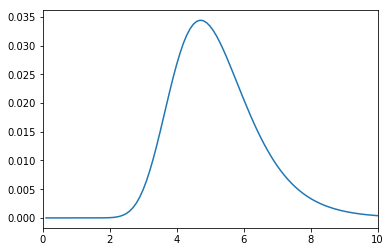

In [166]:
data = cosi_star, cosi_star_err, cosi_disk, cosi_disk_err
prob, kappa_arr = kappa_dist(data, kappa_min=0.1)
plt.xlim(0,10)
plt.plot(kappa_arr, prob/np.sum(prob))

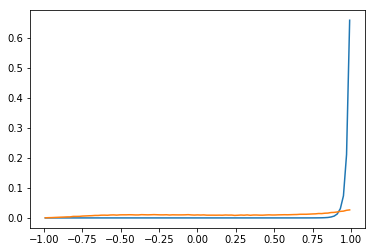

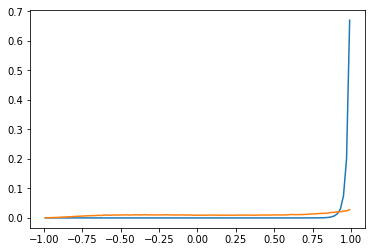

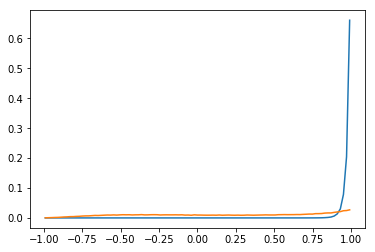

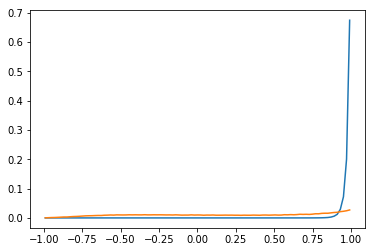

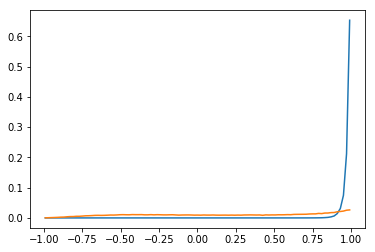

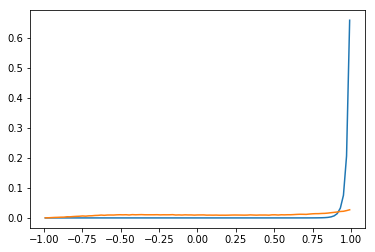

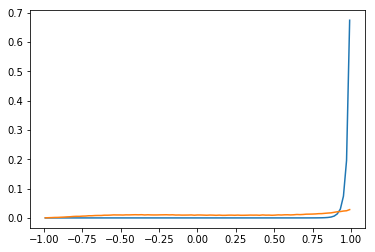

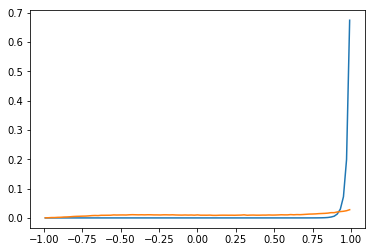

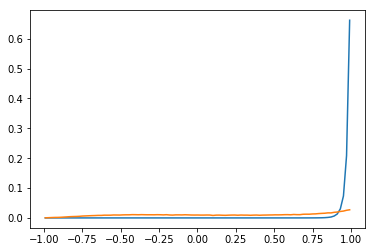

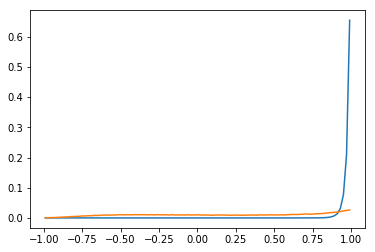

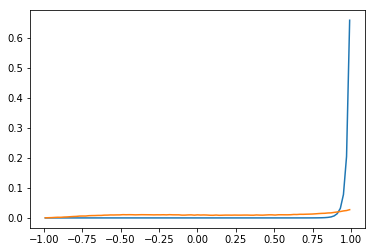

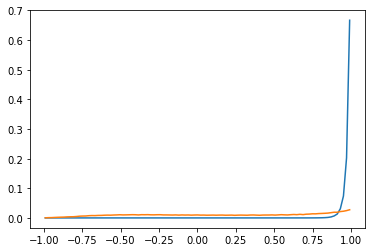

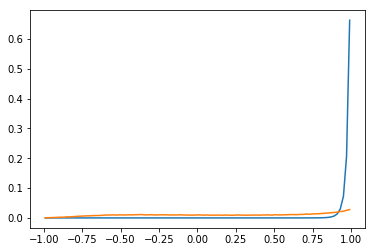

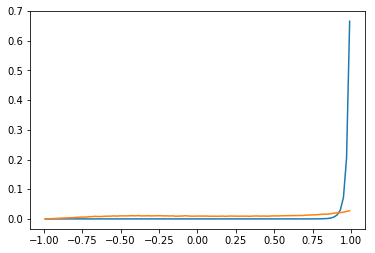

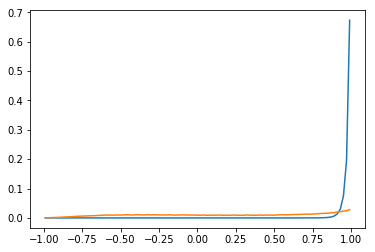

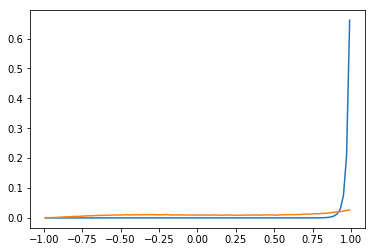

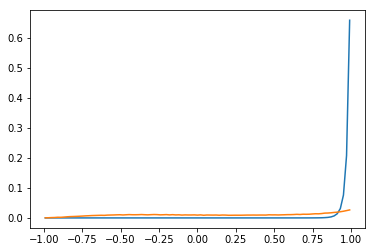

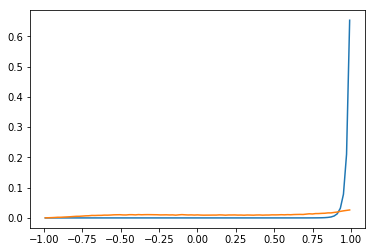

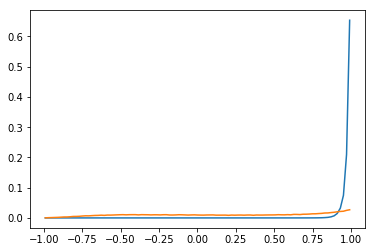

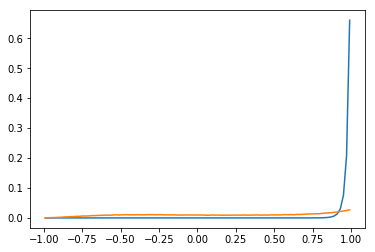

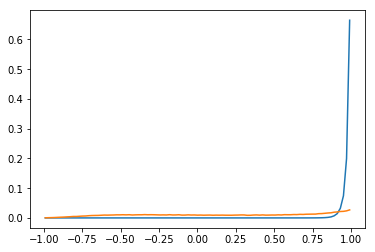

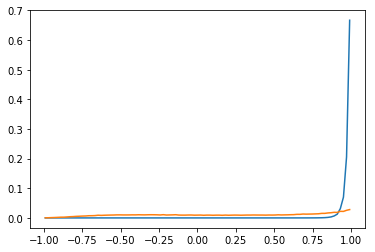

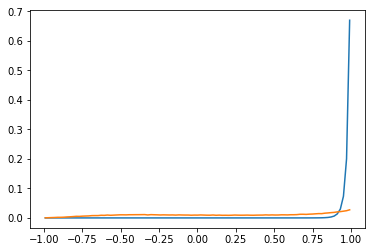

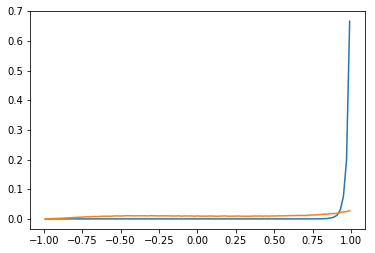

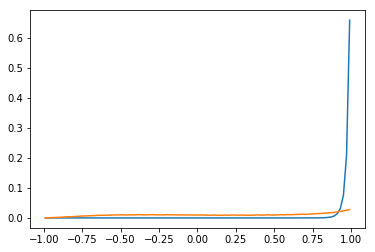

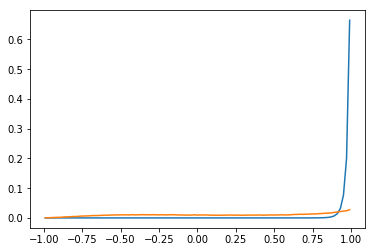

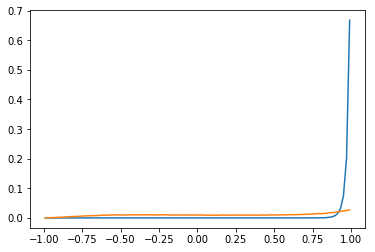

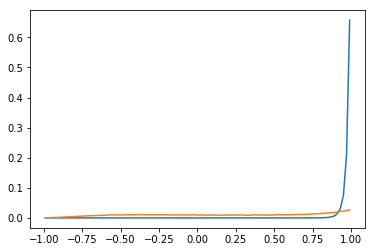

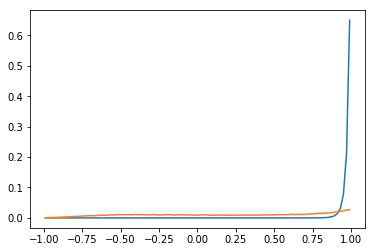

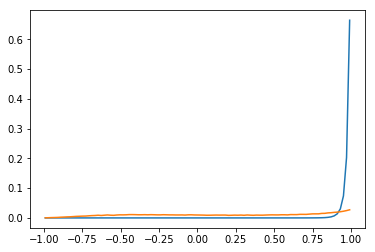

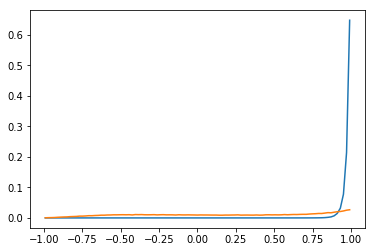

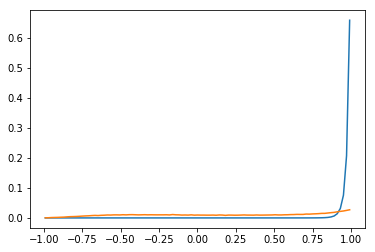

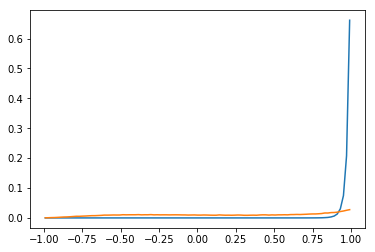

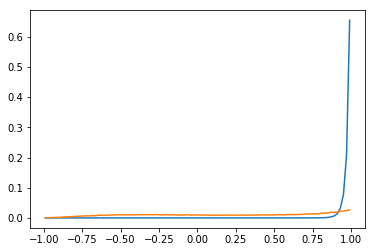

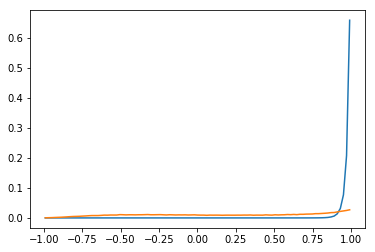

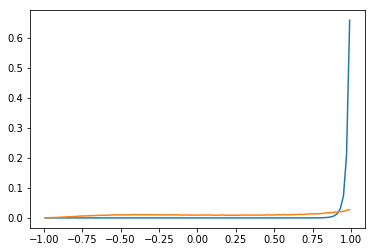

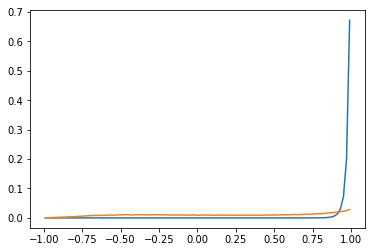

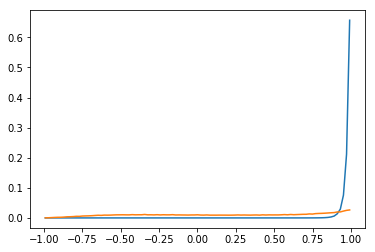

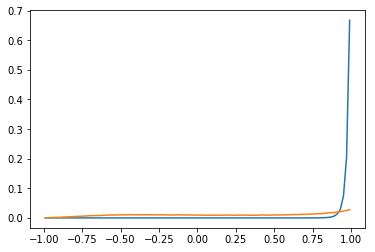

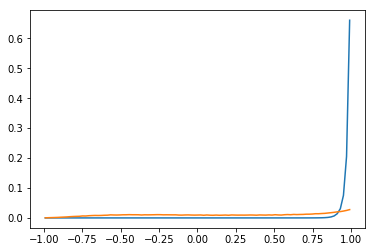

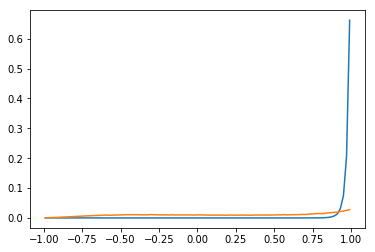

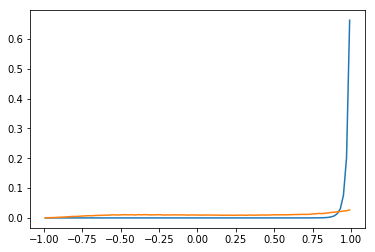

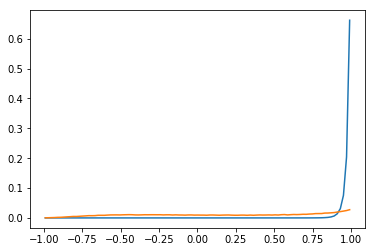

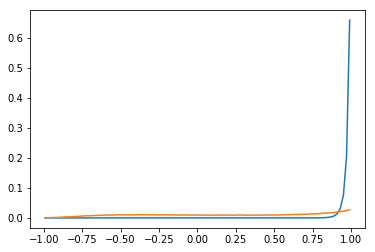

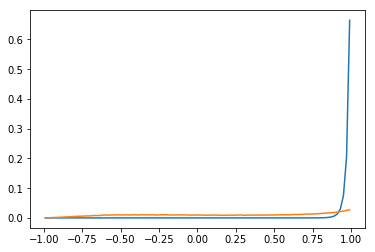

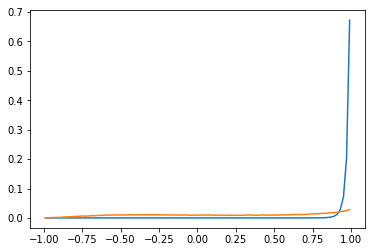

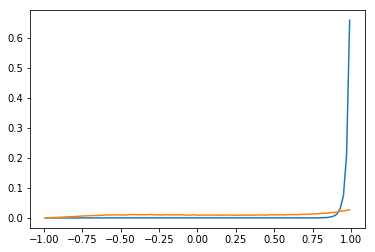

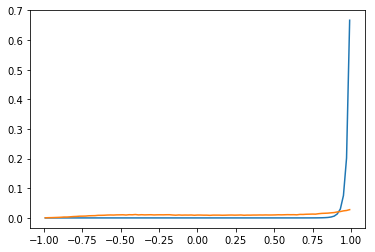

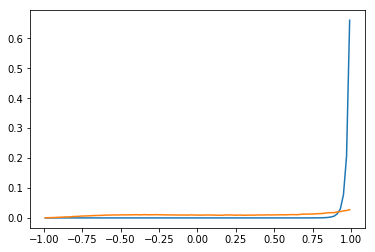

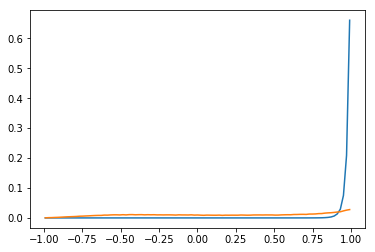

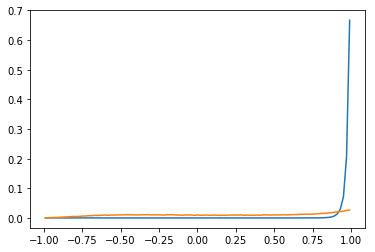

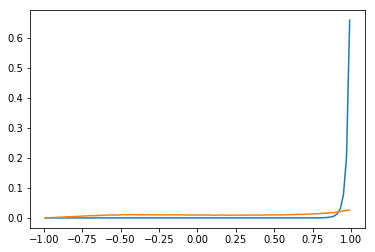

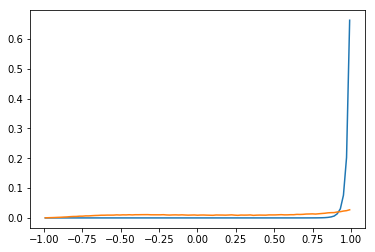

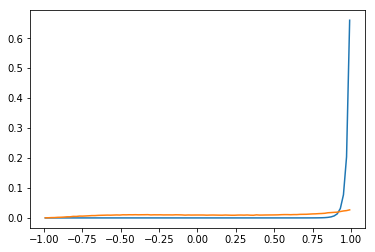

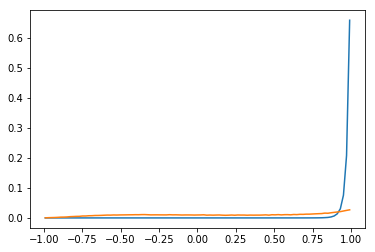

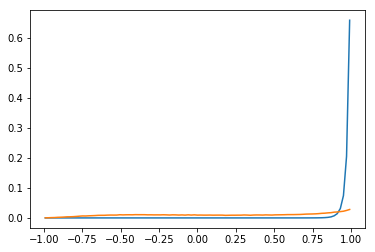

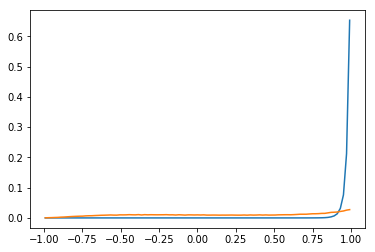

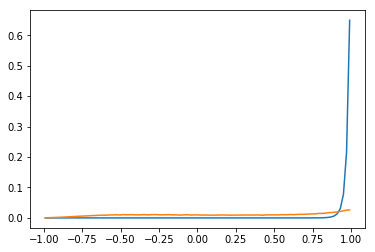

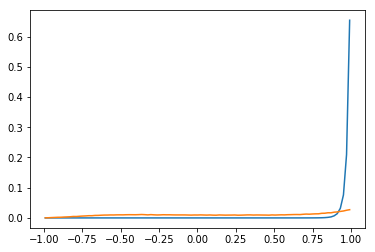

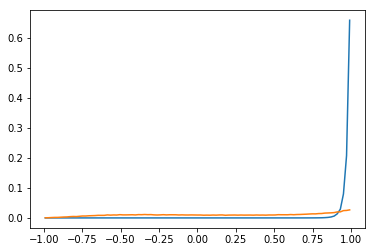

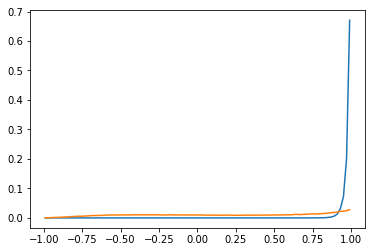

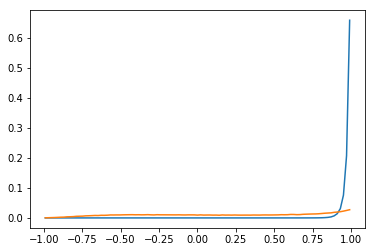

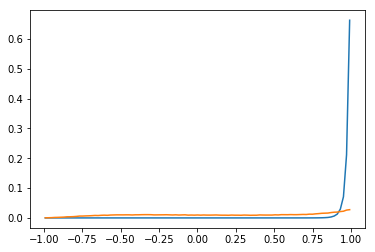

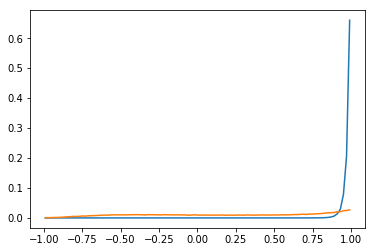

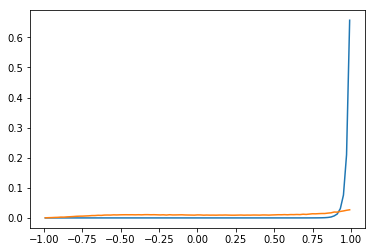

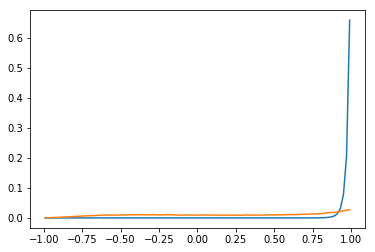

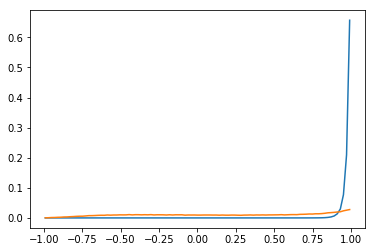

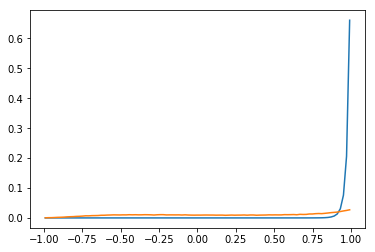

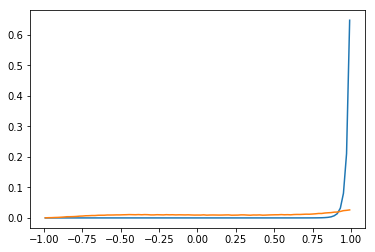

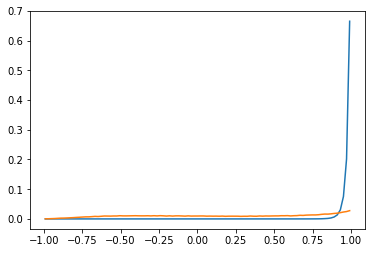

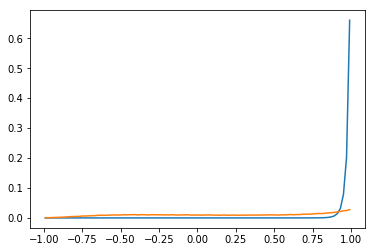

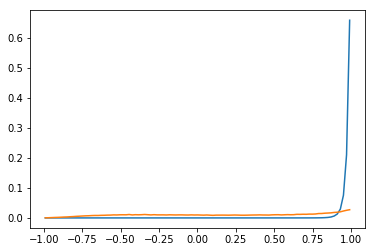

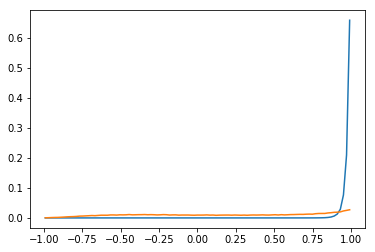

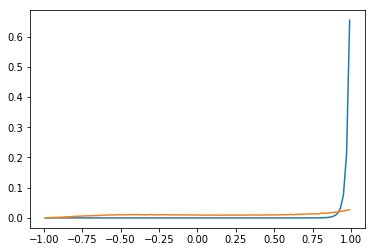

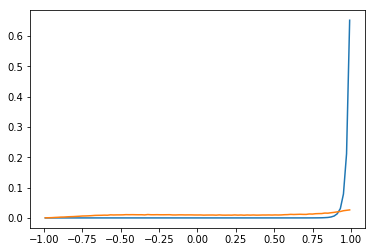

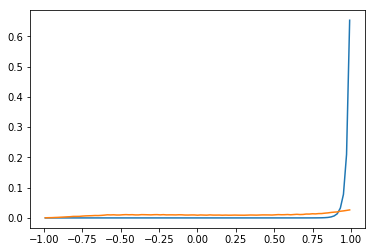

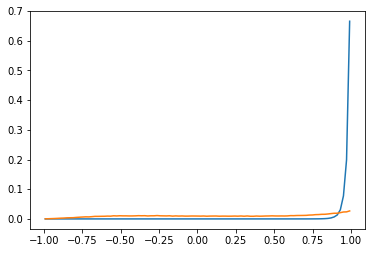

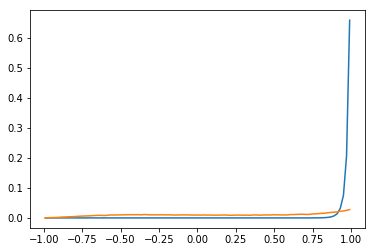

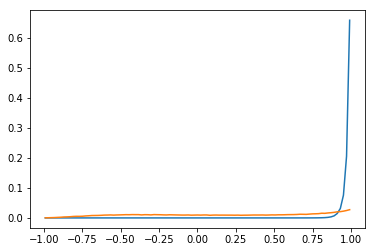

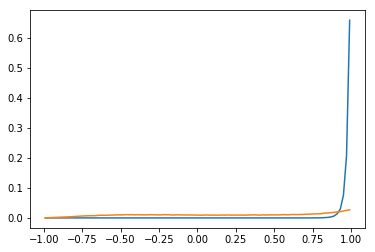

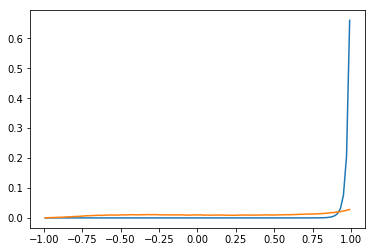

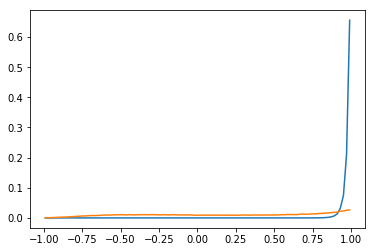

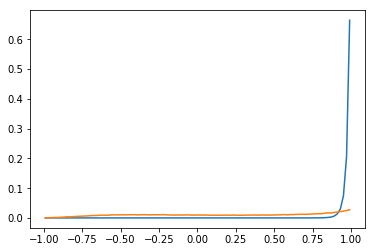

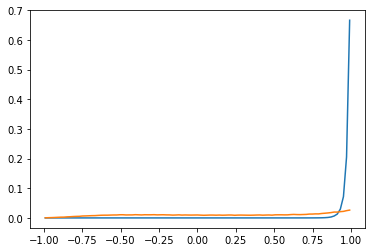

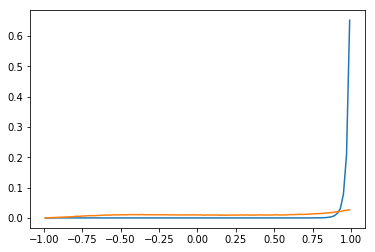

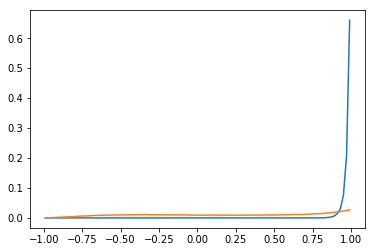

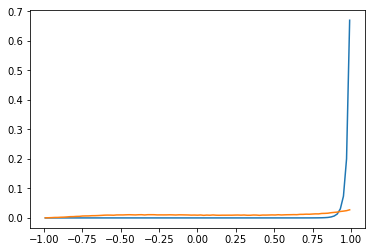

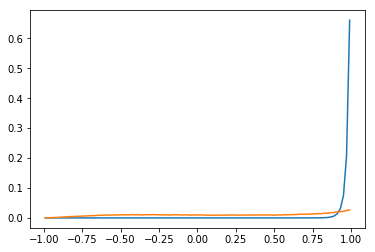

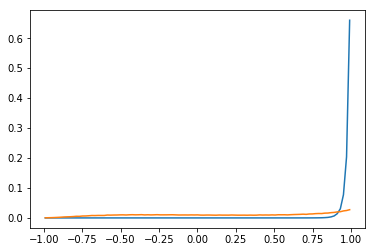

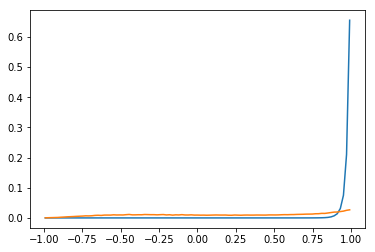

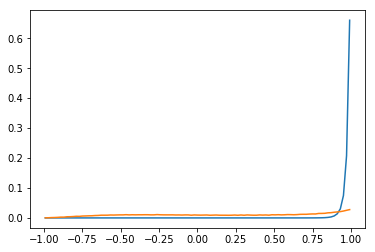

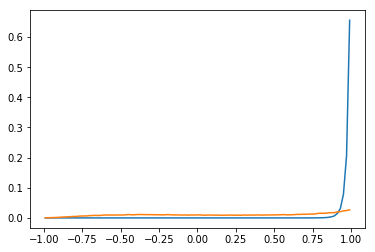

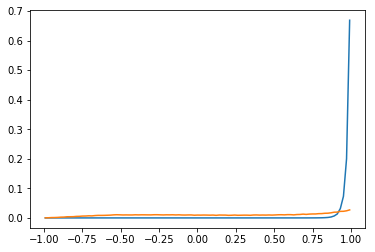

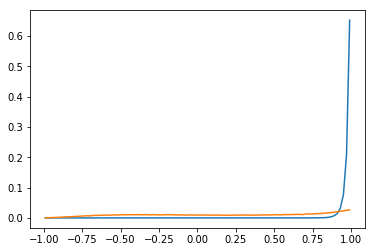

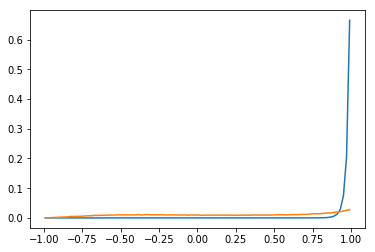

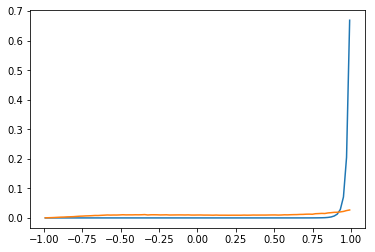

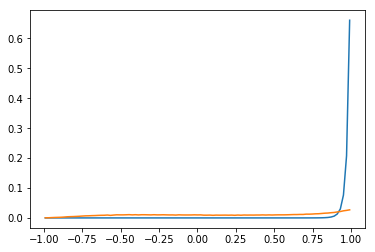

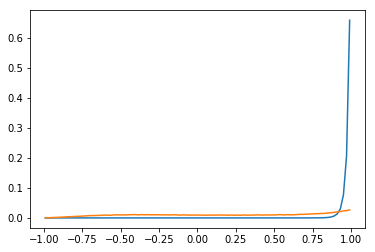

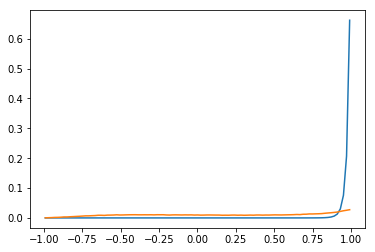

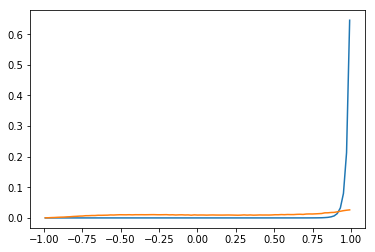

In [153]:
for i in range(len(cosi_star)):
    data = cosi_star[i_dmy ], cosi_star_err[i_dmy ], cosi_disk[i_dmy ],cosi_disk_err[i_dmy ]
    psi_arr2, prob_2, prob_3 = prob_improved(kappa_arr, prob, 1000, data)
    plt.plot(psi_arr2, prob_2/np.sum(prob_2))
    plt.plot(psi_arr2, prob_3/np.sum(prob_3))

    plt.show()
    